In [71]:
import os
import cv2
import numpy as np

dirs = ['ants_1', 'bees']
pixels = []
labels = []
cnt =0
for i, d in enumerate(dirs):
    #print(i , d)
    files = os.listdir('../data/' + d)

    for f in files :
        img = cv2.imread('../data/' + d + '/' + f, 0)
        img = cv2.resize(img, (128, 128))
        img = np.array(img).flatten().tolist()
        pixels.append(img)
        labels.append(i)
        print(i)
        cnt = cnt+1
print(cnt)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
132
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [54]:
#연습문제 4
pixels2 = []
labels2 = []


for i, d in enumerate(dirs):
    files = os.listdir('../data/' + d)

    for file in files:
        img2 = cv2.imread('../data/' + d + '/' + file)
        img2 = cv2.resize(img2, (128, 128))
        b, g, r = cv2.split(img2)

        b = np.array(b).flatten().tostring()
        g = np.array(g).flatten().tostring()
        r = np.array(r).flatten().tostring()
        tmp = b + g + r

        pixels2.append(tmp)
        labels2.append(i)


C:\Users\user\AppData\Local\Temp/ipykernel_18068/1372037568.py:14: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  b = np.array(b).flatten().tostring()
C:\Users\user\AppData\Local\Temp/ipykernel_18068/1372037568.py:15: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  g = np.array(g).flatten().tostring()
C:\Users\user\AppData\Local\Temp/ipykernel_18068/1372037568.py:16: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  r = np.array(r).flatten().tostring()


In [73]:
import pandas as pd

pixels_df = pd.DataFrame(pixels)
print(pixels_df.shape)
pixels_df = pixels_df/255.0

labels_df = pd.DataFrame(labels)
print(labels_df.shape)
labels_df = labels_df.rename(columns={0:'label'})

img_set = pd.concat([pixels_df, labels_df], axis=1)
img_set.head()

(132, 16384)
(132, 1)


,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,0.549020,0.552941,0.545098,0.552941,0.545098,0.556863,0.556863,0.556863,0.552941,0.556863,...,0.294118,0.282353,0.286275,0.274510,0.294118,0.286275,0.286275,0.278431,0.360784,0
1,0.384314,0.392157,0.392157,0.396078,0.396078,0.392157,0.380392,0.388235,0.376471,0.392157,...,0.227451,0.156863,0.066667,0.023529,0.035294,0.047059,0.015686,0.007843,0.007843,0
2,0.290196,0.337255,0.380392,0.403922,0.407843,0.411765,0.411765,0.423529,0.450980,0.462745,...,0.239216,0.250980,0.262745,0.274510,0.286275,0.294118,0.337255,0.380392,0.427451,0
3,0.423529,0.431373,0.415686,0.415686,0.423529,0.423529,0.423529,0.423529,0.411765,0.419608,...,0.427451,0.419608,0.411765,0.396078,0.407843,0.415686,0.427451,0.435294,0.443137,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.164706,0.462745,0.552941,0.525490,0.517647,0.415686,0.396078,0.298039,0.133333,0


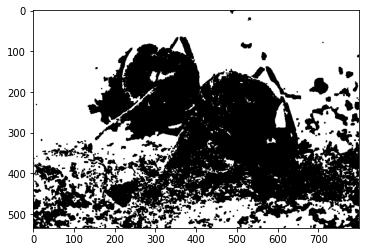

In [56]:
import matplotlib.pyplot as plt

img = cv2.imread('../data/ants_1/800px-Meat_eater_ant_qeen_excavating_hole.jpg', 0)
ret, bin_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

kernel = np.ones((3,3), np.uint8)
img_el = cv2.erode(bin_img, kernel, iterations=1)

plt.imshow(img_el, cmap='gray')

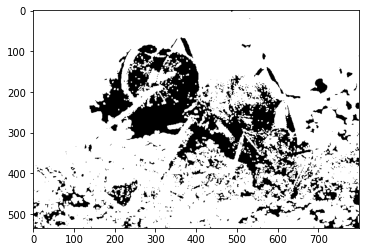

In [57]:
img_dl = cv2.dilate(bin_img, kernel, iterations=1)

plt.imshow(img_dl, cmap='gray')

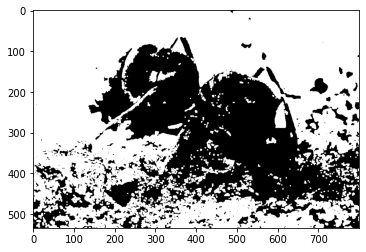

In [58]:
img_op = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel)

plt.imshow(img_op, cmap='gray')

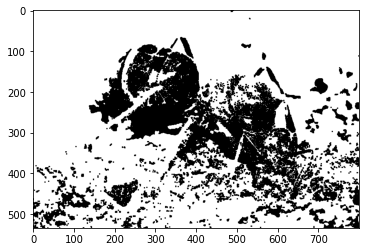

In [59]:
img_cl = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(img_cl, cmap='gray')

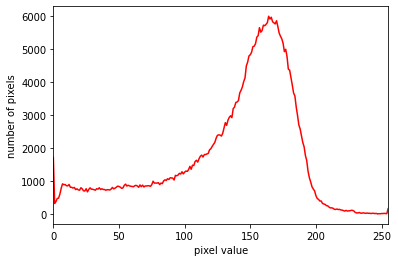

In [60]:
hist_gr, bins = np.histogram(img.ravel(), 256, [0, 256])

plt.xlim(0, 255)
plt.plot(hist_gr, '-r')
plt.xlabel('pixel value')
plt.ylabel('number of pixels')

plt.show()

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

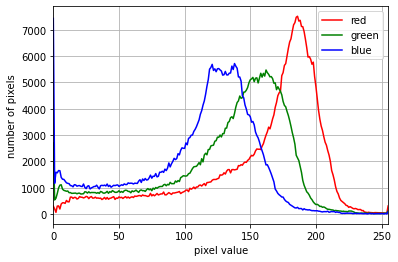

In [63]:
img = cv2.imread('../data/ants_1/800px-Meat_eater_ant_qeen_excavating_hole.jpg')

b, g, r = img[:, :, 0], img[:, :, 1], img[:, :, 2]
hist_r, bins = np.histogram(r.ravel(), 256, [0, 256])
hist_g, bins = np.histogram(g.ravel(), 256, [0, 256])
hist_b, bins = np.histogram(b.ravel(), 256, [0, 256])
print(bins)
plt.xlim(0, 255)
plt.plot(hist_r, '-r', label='red')
plt.plot(hist_g, '-g', label='green')
plt.plot(hist_b, '-b', label='blue')
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.legend()
plt.grid()
plt.show()

연습문제 PCA 차원 압축

In [66]:
from sklearn.decomposition import PCA

pca = PCA(0.80)
print(pixels_df.shape)


pixels_df_pca = pca.fit_transform(pixels_df)

print(pca.n_components_)
print(pixels_df_pca.shape)

(132, 16384)
36
(132, 36)


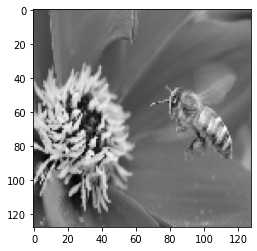

In [77]:
img_set = pd.concat([pd.DataFrame(pixels_df_pca), labels_df], axis=1)
img_set.head()

plt.imshow(np.array(pixels_df)[100].reshape(128, 128), cmap='gray')

t-sne에 의한 차원 압축

In [78]:
from sklearn.manifold import TSNE

tsen = TSNE(n_components=2)
pixels_tsne = tsen.fit_transform(pixels_df)

print(pixels_df.shape)
print(pixels_tsne.shape)

img_set_tsne = pd.concat([pd.DataFrame(pixels_tsne), labels_df], axis=1)

img_set_tsne.head()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(132, 16384)
(132, 2)


,0,1,label
0,-1.052723,-3.745394,0
1,-5.184704,9.424266,0
2,-6.901231,5.391440,0
3,-2.840128,-1.812267,0
4,-0.576357,15.577218,0


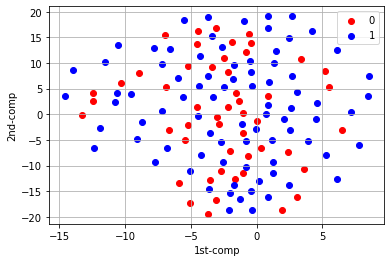

In [79]:
# 0을 플로트
img_set_tsne_0 = img_set_tsne[img_set_tsne['label'] == 0]
img_set_tsne_0 = img_set_tsne_0.drop('label', axis=1)
plt.scatter(img_set_tsne_0[0], img_set_tsne_0[1], c='red', label=0)
# 1을 플로트
img_set_tsne_1 = img_set_tsne[img_set_tsne['label'] == 1]
img_set_tsne_1 = img_set_tsne_1.drop('label', axis=1)
plt.scatter(img_set_tsne_1[0], img_set_tsne_1[1], c='blue', label=1)

plt.xlabel('1st-comp')
plt.ylabel('2nd-comp')
plt.legend()
plt.grid()
plt.show()